In [10]:
library(caret)
library(party) #ctree
library(e1071)

Loading required package: lattice

Loading required package: ggplot2

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



# cTree: Conditional Inference Trees

## Load Data

In [106]:
data(iris)

## Split the Data into Training set and Test set

### Sampling

#### Option 1
- `set.seed()`  can fix random seed

In [107]:
set.seed(123)
samp <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35))
samp

[1]  31  15  14   3  42  43  37  48  25  26  27   5  40  28   9  29   8  41
 [19]   7  10  36  19   4  45  17  11  32  21  12  49  50  13  24  30  33  60
 [37]  73  77  57  98  82  88  75  84  79  55  58  62  63  68  83  96  93  56
 [55]  71  65  59  80  76  66  70  95  61  89  97  92  67  86  69  52 104 113
 [73] 105 125 122 147 132 145 123 135 140 130 112 131 139 141 114 129 144 107
 [91] 103 142 146 126 115 121 148 108 119 110 118 143 138 102 128

#### Option 2
- If you want to run different samples, use `createDataPartition`.
- `set.seed()` does NOT affect the random generation
- `list = T`: list type ; `list = F` matrix type

In [108]:
# samp <- createDataPartition(iris$Species, p = 0.7, list = T) 

In [ ]:
# samp <- head(createDataPartition(iris$Species, p = 0.7, list = F))

### Create training and testing set

In [109]:
train_set <- iris[samp,]
test_set <- iris[-samp,]
head(train_set)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
31,4.8,3.1,1.6,0.2,setosa
15,5.8,4.0,1.2,0.2,setosa
14,4.3,3.0,1.1,0.1,setosa
3,4.7,3.2,1.3,0.2,setosa
42,4.5,2.3,1.3,0.3,setosa
43,4.4,3.2,1.3,0.2,setosa


## Train with training set

In [110]:
formula <- Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width
iris_tree <- ctree(formula, data = train_set)
iris_tree


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  105 

1) Petal.Length <= 1.9; criterion = 1, statistic = 98.171
  2)*  weights = 35 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.6; criterion = 1, statistic = 48.475
    4) Petal.Length <= 4.5; criterion = 0.999, statistic = 14.282
      5)*  weights = 27 
    4) Petal.Length > 4.5
      6)*  weights = 9 
  3) Petal.Width > 1.6
    7)*  weights = 34 

=> _Petal.Length: 1)_ and _Petal.Width: 3)_ are the key variables wither _higher statistic_.

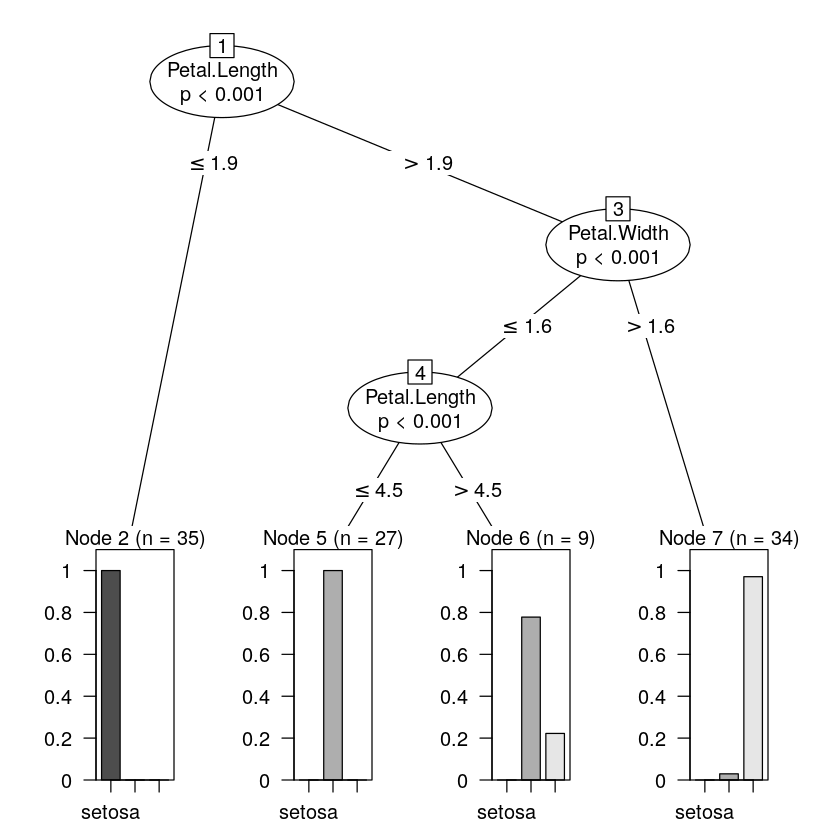

In [111]:
plot(iris_tree, 
     #type = 'simple'
    )

In [112]:
# Alternatively,

In [113]:
irisTree <- ctree(Species ~., data = train_set)
irisTree


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  105 

1) Petal.Length <= 1.9; criterion = 1, statistic = 98.171
  2)*  weights = 35 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.6; criterion = 1, statistic = 48.475
    4) Petal.Length <= 4.5; criterion = 0.999, statistic = 14.282
      5)*  weights = 27 
    4) Petal.Length > 4.5
      6)*  weights = 9 
  3) Petal.Width > 1.6
    7)*  weights = 34 

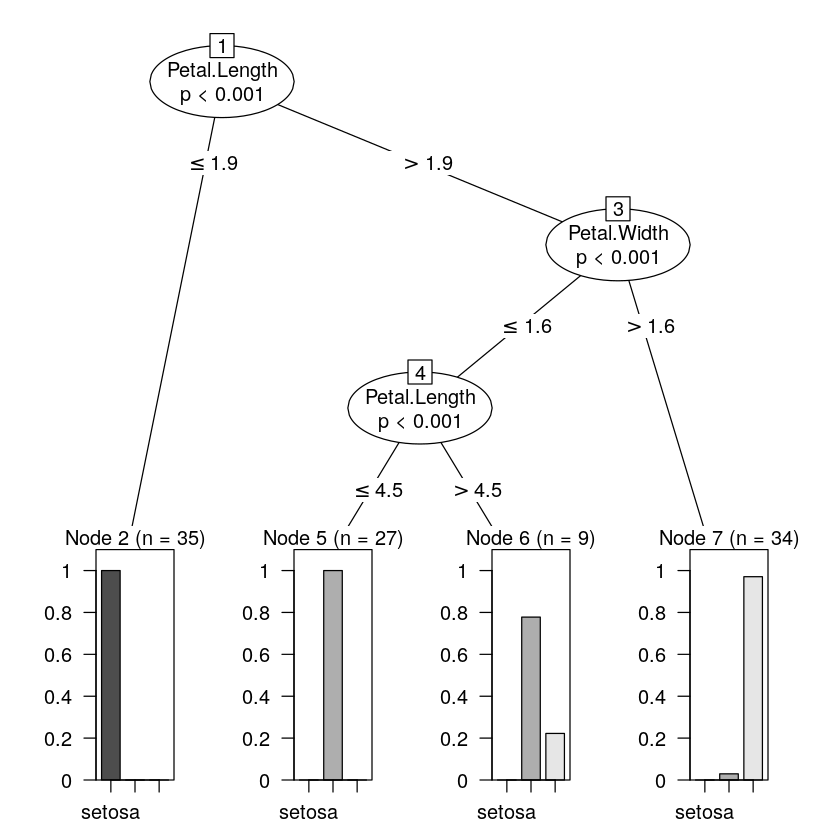

In [114]:
plot(irisTree)

In [115]:
# Graph options,

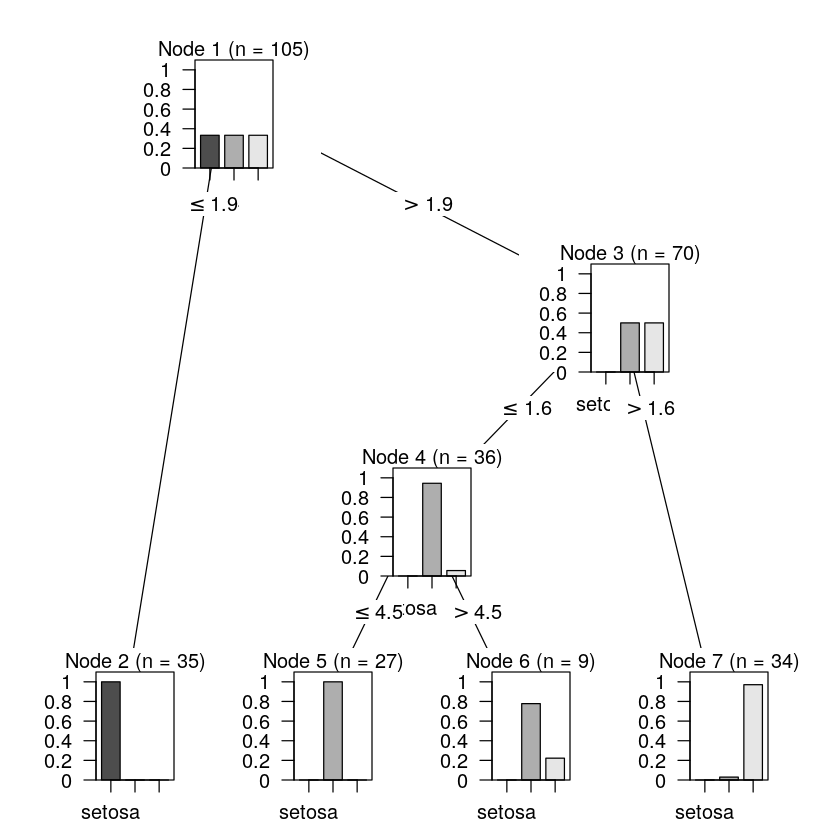

In [116]:
plot(irisTree,
     inner_panel = node_barplot,
     #edge_panel = function(...) invisible(),
     tnex = 1)

## Predict with testing set

In [122]:
head(test_set)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
16,5.7,4.4,1.5,0.4,setosa
18,5.1,3.5,1.4,0.3,setosa
20,5.1,3.8,1.5,0.3,setosa


In [117]:
pred <- predict(irisTree, test_set)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor virginica  versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] versicolor virginica  virginica  virginica  versicolor virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

## Calculate Prediction Accuracy

In [118]:
mean(pred == test_set$Species)

[1] 0.9333333

## Classified Table

In [121]:
confusionMatrix(pred, test_set$Species)
# table(pred, test_set$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.8667
Specificity                 1.0000            0.9333           0.9667
Pos Pred Value              1.0000            0.8750           0.9286
Neg Pred Value              1.0000            0.9655           0.9355
Prevalence

In [ ]:
'==================================================================='

## Predict with training set
- based on the model trained above.

In [126]:
head(train_set)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
31,4.8,3.1,1.6,0.2,setosa
15,5.8,4.0,1.2,0.2,setosa
14,4.3,3.0,1.1,0.1,setosa
3,4.7,3.2,1.3,0.2,setosa
42,4.5,2.3,1.3,0.3,setosa
43,4.4,3.2,1.3,0.2,setosa


In [127]:
pred <- predict(iris_tree, train_set)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     versicolor
 [37] versicolor versicolor versicolor versicolor versicolor versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] virginica  versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor virginica  virginica 
 [73] virginica  virginica  virginica  virginica  virginica  virginica 
 [79] virginica  versicolor virginica  versicolor virginica  virginica 
 [85] virginica  virginica  virginica  virginica  virginica  virginica 
 [91] virginica  virginica  virginica  virginica  virginica  virginica 
 [97] virginica  virginica  virginica  virginica  virginica  virginica 
[103] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [128]:
confusionMatrix(pred, train_set$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         35          0         0
  versicolor      0         34         2
  virginica       0          1        33

Overall Statistics
                                          
               Accuracy : 0.9714          
                 95% CI : (0.9188, 0.9941)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9571          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9714           0.9429
Specificity                 1.0000            0.9714           0.9857
Pos Pred Value              1.0000            0.9444           0.9706
Neg Pred Value              1.0000            0.9855           0.9718
P

Decision tree is prone to overfitting.  
- Predict with testing set (new data): 93% Accuracy
- Predict with training set: 97% Accuracy